In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('/content/parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.shape

(195, 24)

In [6]:
df.tail(30)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
165,phon_R01_S42_1,236.200,244.663,102.137,0.00277,0.00001,0.00154,0.00153,0.00462,0.02448,0.217,0.01410,0.01426,0.01621,0.04231,0.00620,24.078,0,0.469928,0.628232,-6.816086,0.172270,2.235197,0.119652
166,phon_R01_S42_2,237.323,243.709,229.256,0.00303,0.00001,0.00173,0.00159,0.00519,0.01242,0.116,0.00696,0.00747,0.00882,0.02089,0.00533,24.679,0,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
167,phon_R01_S42_3,260.105,264.919,237.303,0.00339,0.00001,0.00205,0.00186,0.00616,0.02030,0.197,0.01186,0.01230,0.01367,0.03557,0.00910,21.083,0,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
168,phon_R01_S42_4,197.569,217.627,90.794,0.00803,0.00004,0.00490,0.00448,0.01470,0.02177,0.189,0.01279,0.01272,0.01439,0.03836,0.01337,19.269,0,0.372222,0.725216,-5.736781,0.164529,2.882450,0.202879
169,phon_R01_S42_5,240.301,245.135,219.783,0.00517,0.00002,0.00316,0.00283,0.00949,0.02018,0.212,0.01176,0.01191,0.01344,0.03529,0.00965,21.020,0,0.371837,0.646167,-7.169701,0.073298,2.266432,0.100881
170,phon_R01_S42_6,244.990,272.210,239.170,0.00451,0.00002,0.00279,0.00237,0.00837,0.01897,0.181,0.01084,0.01121,0.01255,0.03253,0.01049,21.528,0,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
171,phon_R01_S43_1,112.547,133.374,105.715,0.00355,0.00003,0.00166,0.00190,0.00499,0.01358,0.129,0.00664,0.00786,0.01140,0.01992,0.00435,26.436,0,0.413295,0.756700,-6.323531,0.218885,2.193412,0.160376
172,phon_R01_S43_2,110.739,113.597,100.139,0.00356,0.00003,0.00170,0.00200,0.00510,0.01484,0.133,0.00754,0.00950,0.01285,0.02261,0.00430,26.550,0,0.369090,0.776158,-6.085567,0.192375,1.889002,0.174152
173,phon_R01_S43_3,113.715,116.443,96.913,0.00349,0.00003,0.00171,0.00203,0.00514,0.01472,0.133,0.00748,0.00905,0.01148,0.02245,0.00478,26.547,0,0.380253,0.766700,-5.943501,0.192150,1.852542,0.179677
174,phon_R01_S43_4,117.004,144.466,99.923,0.00353,0.00003,0.00176,0.00218,0.00528,0.01657,0.145,0.00881,0.01062,0.01318,0.02643,0.00590,25.445,0,0.387482,0.756482,-6.012559,0.229298,1.872946,0.163118


# Locating 7th sample for three individuals

In most cases in this data set, there are six samples per individual.  In three cases, there are 7 samples per individual.  The seventh sample is being removed to make the number of samples per individual the same. 




In [7]:
strings = df['name']   #Source: https://www.kite.com/python/answers/how-to-check-if-a-list-contains-a-substring-in-python
substring = "_7"       #Identifying if there are any sample names with _7

substring_in_list = any(substring in string for string in strings)

print(substring_in_list)

True


In [8]:
matching = [s for s in df['name'] if "_7" in s] #Source: https://stackoverflow.com/questions/4843158/how-to-check-if-a-string-is-a-substring-of-items-in-a-list-of-strings
matching                                        #Identify names of the 7th samples

['phon_R01_S21_7', 'phon_R01_S27_7', 'phon_R01_S35_7']

In [9]:
df.loc[df['name']=='phon_R01_S21_7']    #Locate rows with 7th sample

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
90,phon_R01_S21_7,166.605,206.008,78.032,0.00742,0.00004,0.00387,0.00453,0.01161,0.0664,0.634,0.0365,0.04282,0.05114,0.10949,0.08725,11.744,1,0.65341,0.733165,-4.508984,0.389232,3.317586,0.301952


In [10]:
df.loc[df['name']=='phon_R01_S27_7']

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
121,phon_R01_S27_7,176.824,215.293,83.961,0.0046,0.00003,0.00209,0.00221,0.00628,0.01169,0.117,0.00534,0.0063,0.01104,0.01603,0.01161,27.166,1,0.400088,0.656182,-4.711007,0.281618,2.655744,0.234809


In [11]:
df.loc[df['name']=='phon_R01_S35_7']

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,1.018,0.04284,0.05556,0.08318,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [12]:
df = df.drop([df.index[90], df.index[121], df.index[152]])   #Drop 7th rows for each of the three individuals
df.shape 

(192, 24)

In [13]:
def get_range(df, start, finish):  #Source: https://stackoverflow.com/questions/50805446/pandas-select-range-from-index-column
             return df[start:finish]  #Print portion of database to determine if 7th samples were removed
print(get_range(df, 76,100))

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
76   phon_R01_S19_5      112.876       148.826  ...  0.341169  2.007923  0.193918
77   phon_R01_S19_6      110.568       125.394  ...  0.250572  1.777901  0.232744
78   phon_R01_S20_1       95.385       102.145  ...  0.249494  2.017753  0.260015
79   phon_R01_S20_2      100.770       115.697  ...  0.265699  2.398422  0.277948
80   phon_R01_S20_3       96.106       108.664  ...  0.155097  2.645959  0.327978
81   phon_R01_S20_4       95.605       107.715  ...  0.210458  2.232576  0.260633
82   phon_R01_S20_5      100.960       110.019  ...  0.146948  2.428306  0.264666
83   phon_R01_S20_6       98.804       102.305  ...  0.078202  2.053601  0.177275
84   phon_R01_S21_1      176.858       205.560  ...  0.343073  3.099301  0.242119
85   phon_R01_S21_2      180.978       200.125  ...  0.315903  3.098256  0.200423
86   phon_R01_S21_3      178.222       202.450  ...  0.335753  2.654271  0.144614
87   phon_R01_S2

In [14]:
df.info()  #Now 192 samples which would be 32 individuals with 6 samples each

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              192 non-null    object 
 1   MDVP:Fo(Hz)       192 non-null    float64
 2   MDVP:Fhi(Hz)      192 non-null    float64
 3   MDVP:Flo(Hz)      192 non-null    float64
 4   MDVP:Jitter(%)    192 non-null    float64
 5   MDVP:Jitter(Abs)  192 non-null    float64
 6   MDVP:RAP          192 non-null    float64
 7   MDVP:PPQ          192 non-null    float64
 8   Jitter:DDP        192 non-null    float64
 9   MDVP:Shimmer      192 non-null    float64
 10  MDVP:Shimmer(dB)  192 non-null    float64
 11  Shimmer:APQ3      192 non-null    float64
 12  Shimmer:APQ5      192 non-null    float64
 13  MDVP:APQ          192 non-null    float64
 14  Shimmer:DDA       192 non-null    float64
 15  NHR               192 non-null    float64
 16  HNR               192 non-null    float64
 1

# Data Cleaning


---



# Check for duplicate rows

In [16]:
df.duplicated().sum() #no duplicate rows

0

# Check for missing values

In [17]:
df.isnull().sum() #no missing values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#Exploratory Data Analysis


---





In [15]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,153.817917,196.776349,116.389750,0.006114,0.000044,0.003245,0.003377,0.009737,0.029314,0.277448,0.015468,0.017612,0.023701,0.046404,0.023873,21.976073,0.750000,0.497796,0.718154,-5.710404,0.224700,2.371348,0.204615
std,41.548965,92.158243,43.508538,0.004642,0.000034,0.002852,0.002598,0.008554,0.018308,0.186884,0.009898,0.011635,0.016387,0.029694,0.039213,4.288654,0.434145,0.103722,0.055515,1.073304,0.082583,0.374673,0.088719
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.262000,134.549750,85.286250,0.003450,0.000020,0.001658,0.001855,0.004975,0.016537,0.148750,0.008268,0.009585,0.013085,0.024802,0.005890,19.251750,0.750000,0.421768,0.674855,-6.456900,0.173470,2.094037,0.136103
50%,148.367000,172.917500,104.376000,0.004940,0.000030,0.002485,0.002680,0.007455,0.022965,0.219000,0.012780,0.013450,0.018125,0.038335,0.011545,22.152000,1.000000,0.493649,0.722170,-5.730418,0.217525,2.352424,0.193324
75%,182.393500,224.093750,139.504250,0.007285,0.000060,0.003747,0.003912,0.011250,0.037610,0.348500,0.019063,0.021882,0.029198,0.057193,0.024960,25.053750,1.000000,0.586366,0.762563,-5.127827,0.271301,2.614510,0.252080
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Univariate visuals for target and all features

In [24]:
parkinsons = len(df.loc[df['status']==1]) #find number in study diagnosed with PD and save to variable
no_parkinsons = len(df.loc[df['status']==0])

Text(0, 0.5, 'Number of Samples')

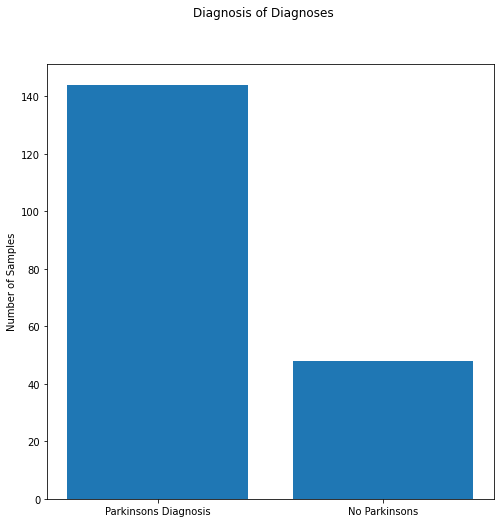

In [25]:
data = {'Parkinsons Diagnosis': parkinsons, 'No Parkinsons': no_parkinsons}  
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(figsize=(8,8), sharey=True)
axs.bar(names, values)
fig.suptitle('Diagnosis of Diagnoses')
plt.ylabel('Number of Samples')

The visual above is showing the total number of diagnoses for each sample taken.  This is not adjusted for individual people.  There are almost 3 times as many Parkinsons Diagnoses as No Parkinsons in this data set.

********************************************************

The histograms below show the frequency of different voice measurements occuring in the data set and point to the potential for outliers.

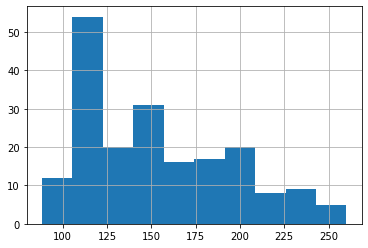

In [26]:
df['MDVP:Fo(Hz)'].hist()


Text(0.5, 1.0, '')

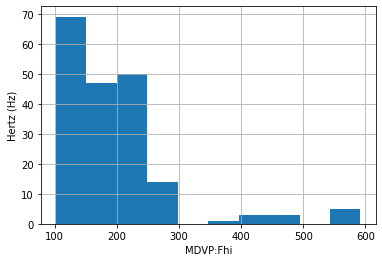

In [27]:
df['MDVP:Fhi(Hz)'].hist()

plt.xlabel('MDVP:Fhi')
plt.ylabel('Hertz (Hz)')
plt.title('')

Possible outliers in the Maximum Vocal Fundamental Frequency.  Data is skewed right.

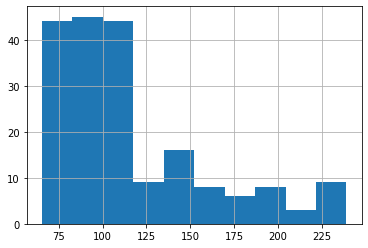

In [28]:
df['MDVP:Flo(Hz)'].hist()


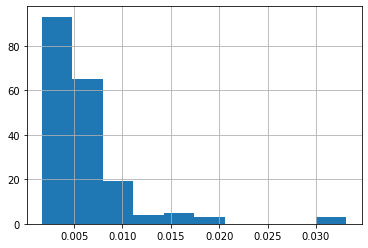

In [29]:
df['MDVP:Jitter(%)'].hist()


Possible outliers in Jitter.

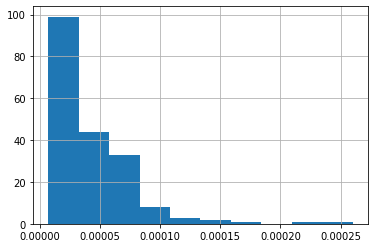

In [30]:
df['MDVP:Jitter(Abs)'].hist()


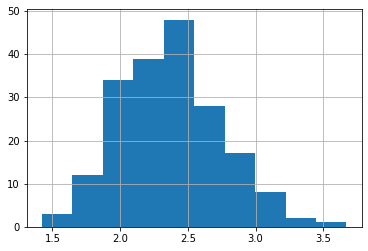

In [31]:
df['D2'].hist()


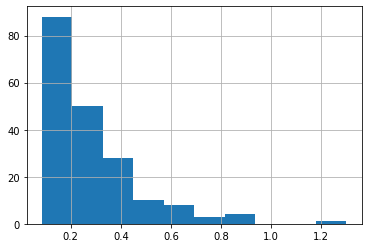

In [32]:
df['MDVP:Shimmer(dB)'].hist()


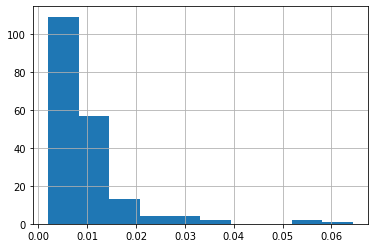

In [33]:
df['Jitter:DDP'].hist()


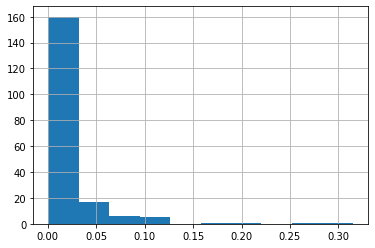

In [34]:
df['NHR'].hist()


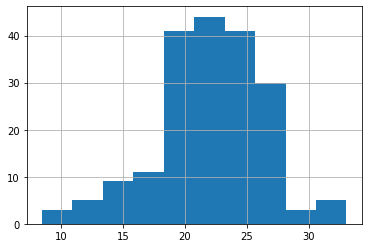

In [35]:
df['HNR'].hist()


********************************************

The boxplots below are for varous voice measurements in the data set.  The plots indicate that for many of the measurements there are outliers.

Text(0.5, 1.0, 'Two Nonlinear Measures of Fundamental Frequency Variation')

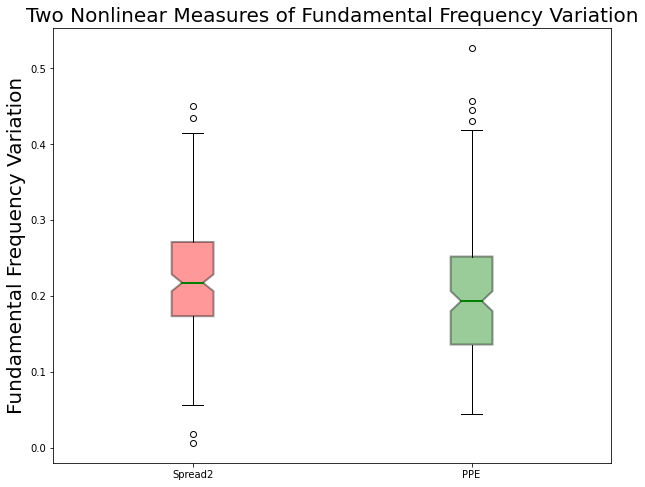

In [59]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8)) #Creates subplots out of the boxplots

boxplots = axes.boxplot([df['spread2'], df['PPE']], notch = True, labels = ['Spread2', 'PPE'], patch_artist = True, medianprops = dict(linestyle='-', linewidth=2, color='green'), boxprops = dict(linestyle='--', linewidth=2, color='Black',  facecolor = 'yellow', alpha = .4));

boxplot1 = boxplots['boxes'][0] #save the location of the first boxplot on the left to a variable boxplot1
boxplot2 = boxplots['boxes'][1]

boxplot1.set_facecolor('red') #color boxplot1 red
boxplot2.set_facecolor('green') #color boxplot2 green
plt.ylabel('Fundamental Frequency Variation', fontsize = 20);
plt.title('Two Nonlinear Measures of Fundamental Frequency Variation', fontsize = 20)

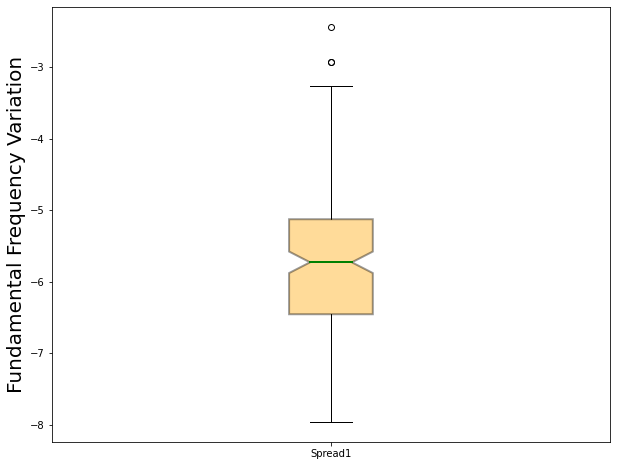

In [37]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8)) #Creates subplots out of the boxplots

boxplots = axes.boxplot([df['spread1']], notch = True, labels = ['Spread1'], patch_artist = True, medianprops = dict(linestyle='-', linewidth=2, color='green'), boxprops = dict(linestyle='--', linewidth=2, color='Black',  facecolor = 'yellow', alpha = .4));

boxplot1 = boxplots['boxes'][0] #save the location of the first boxplot on the left to a variable boxplot1

boxplot1.set_facecolor('orange') 
plt.ylabel('Fundamental Frequency Variation', fontsize = 20);


Text(0.5, 1.0, 'Multi Dimensional Voice Program Measurements')

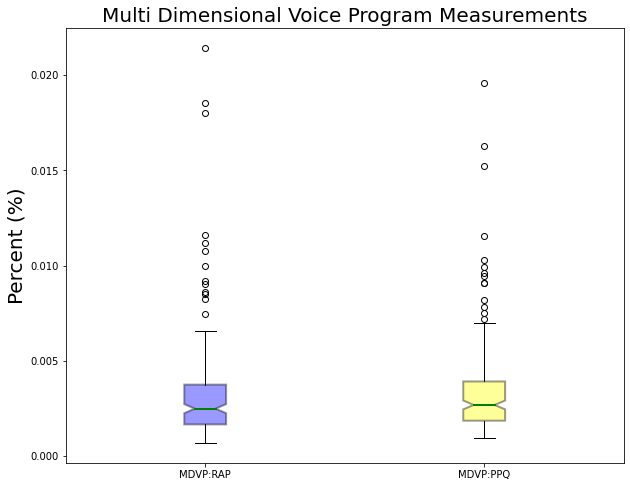

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8)) #Creates subplots out of the boxplots

boxplots = axes.boxplot([df['MDVP:RAP'], df['MDVP:PPQ']], notch = True, labels = ['MDVP:RAP', 'MDVP:PPQ'], patch_artist = True, medianprops = dict(linestyle='-', linewidth=2, color='green'), boxprops = dict(linestyle='--', linewidth=2, color='Black',  facecolor = 'yellow', alpha = .4));

boxplot1 = boxplots['boxes'][0] #save the location of the first boxplot on the left to a variable boxplot1
boxplot2 = boxplots['boxes'][1]

boxplot1.set_facecolor('blue') 
boxplot2.set_facecolor('yellow') 

plt.ylabel('Percent (%)', fontsize = 20)
plt.title('Multi Dimensional Voice Program Measurements', fontsize = 20)


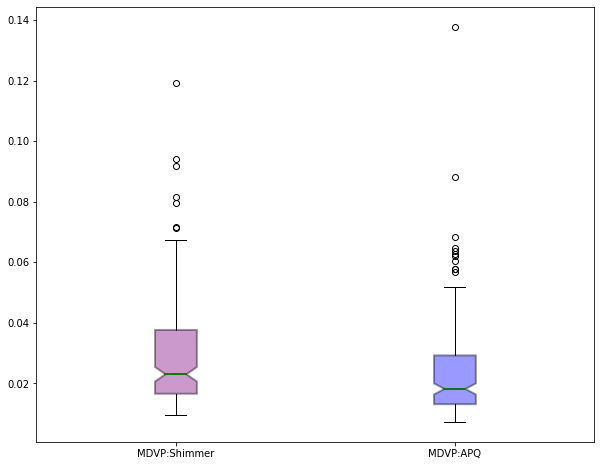

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8)) #Creates subplots out of the boxplots

boxplots = axes.boxplot([df['MDVP:Shimmer'], df['MDVP:APQ']], notch = True, labels = ['MDVP:Shimmer', 'MDVP:APQ'], patch_artist = True, medianprops = dict(linestyle='-', linewidth=2, color='green'), boxprops = dict(linestyle='--', linewidth=2, color='Black',  facecolor = 'yellow', alpha = .4));

boxplot1 = boxplots['boxes'][0] #save the location of the first boxplot on the left to a variable boxplot1
boxplot2 = boxplots['boxes'][1]

boxplot1.set_facecolor('purple') 
boxplot2.set_facecolor('blue') 


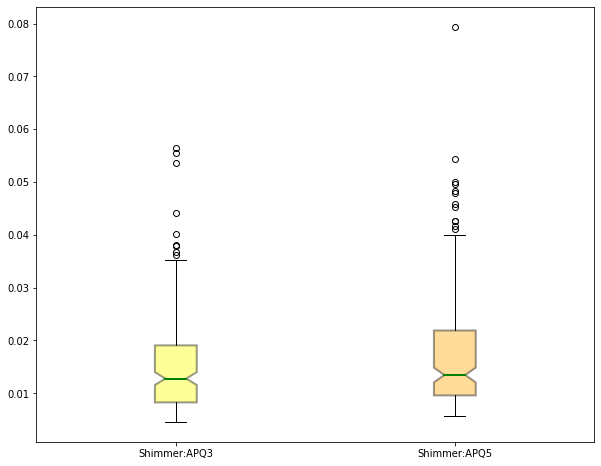

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8)) #Creates subplots out of the boxplots

boxplots = axes.boxplot([df['Shimmer:APQ3'], df['Shimmer:APQ5']], notch = True, labels = ['Shimmer:APQ3', 'Shimmer:APQ5'], patch_artist = True, medianprops = dict(linestyle='-', linewidth=2, color='green'), boxprops = dict(linestyle='--', linewidth=2, color='Black',  facecolor = 'yellow', alpha = .4));

boxplot1 = boxplots['boxes'][0] #save the location of the first boxplot on the left to a variable boxplot1
boxplot2 = boxplots['boxes'][1]

boxplot1.set_facecolor('yellow') 
boxplot2.set_facecolor('orange') 

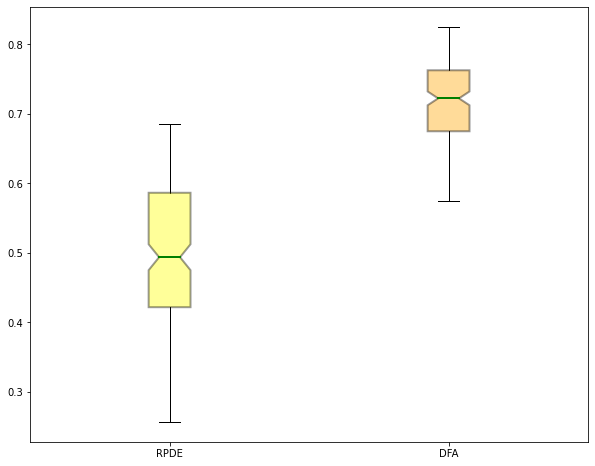

In [41]:
ig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8)) #Creates subplots out of the boxplots

boxplots = axes.boxplot([df['RPDE'], df['DFA']], notch = True, labels = ['RPDE', 'DFA'], patch_artist = True, medianprops = dict(linestyle='-', linewidth=2, color='green'), boxprops = dict(linestyle='--', linewidth=2, color='Black',  facecolor = 'yellow', alpha = .4));

boxplot1 = boxplots['boxes'][0] #save the location of the first boxplot on the left to a variable boxplot1
boxplot2 = boxplots['boxes'][1]

boxplot1.set_facecolor('yellow') 
boxplot2.set_facecolor('orange') 

# Correlation Heatmap




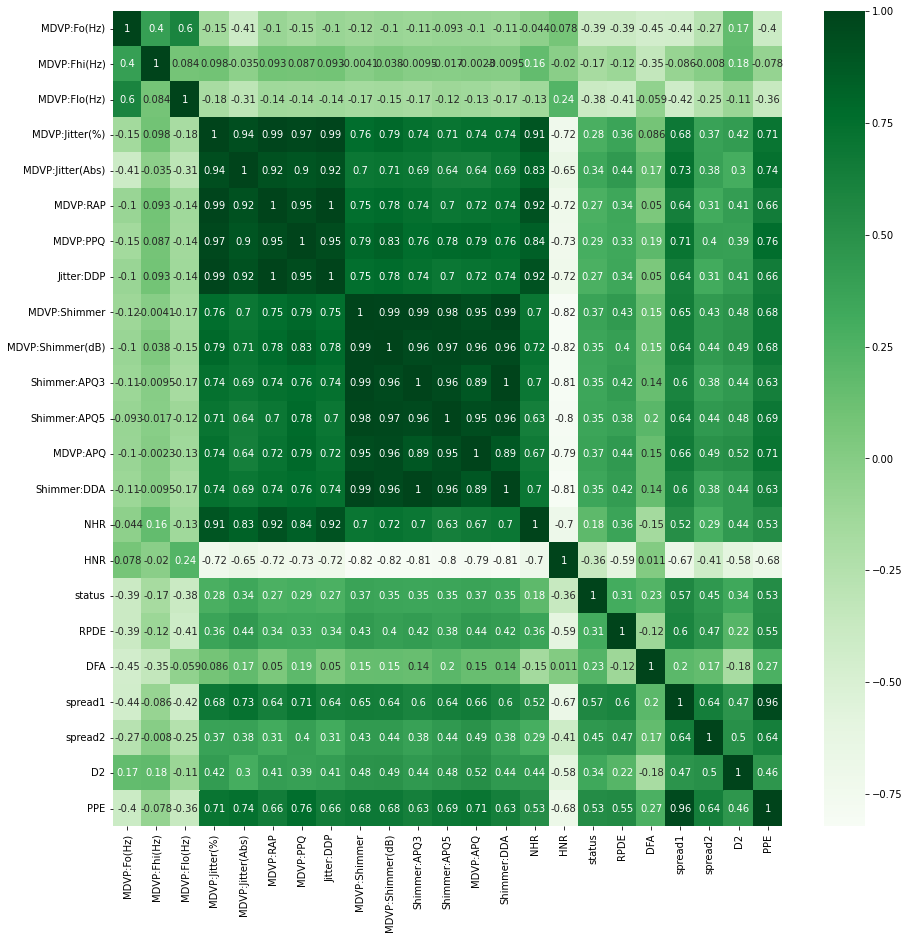

In [42]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, cmap = 'Greens', annot=True)

There are moderate correlations between status (Parkinson's diagnosis) and PPE, spread1, and spread2.  These are 0.53, 0.56, and 0.45, respectively. There are also voice measurements that have high correlations with each other. 

In [43]:
df.head(6)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775


Text(0.5, 1.0, 'PPE Values for One Person')

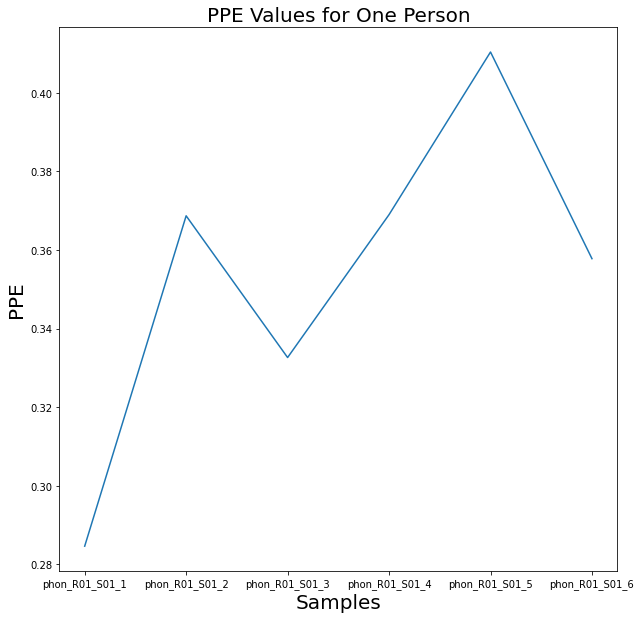

In [44]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df[:6], x="name", y="PPE")
plt.ylabel('PPE', fontsize = 20)
plt.xlabel('Samples', fontsize = 20)
plt.title('PPE Values for One Person', fontsize = 20)

The graph above shows the PPE values for six samples taken from one subject and show overall an upward trend. These samples come from a subject with a positive Parkinson's Diagnosis.

Text(0.5, 1.0, 'Two Voice Measures and Parkinsons Diagnosis')

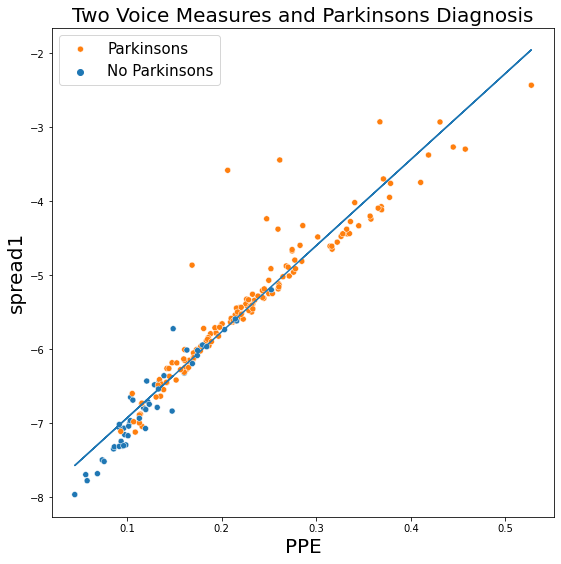

In [53]:
plt.figure(figsize=(9,9))
Scatter = sns.scatterplot(x = 'PPE', y = 'spread1', hue = df['status'], data = df);

plt.ylabel('spread1', fontsize = 20)
plt.xlabel('PPE', fontsize = 20)
plt.legend(loc='upper left', labels=['Parkinsons', 'No Parkinsons' ], fontsize=15)


x = df['PPE']
y = df['spread1']

# obtain m (slope) and b (y-intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.title('Two Voice Measures and Parkinsons Diagnosis', fontsize = 20)

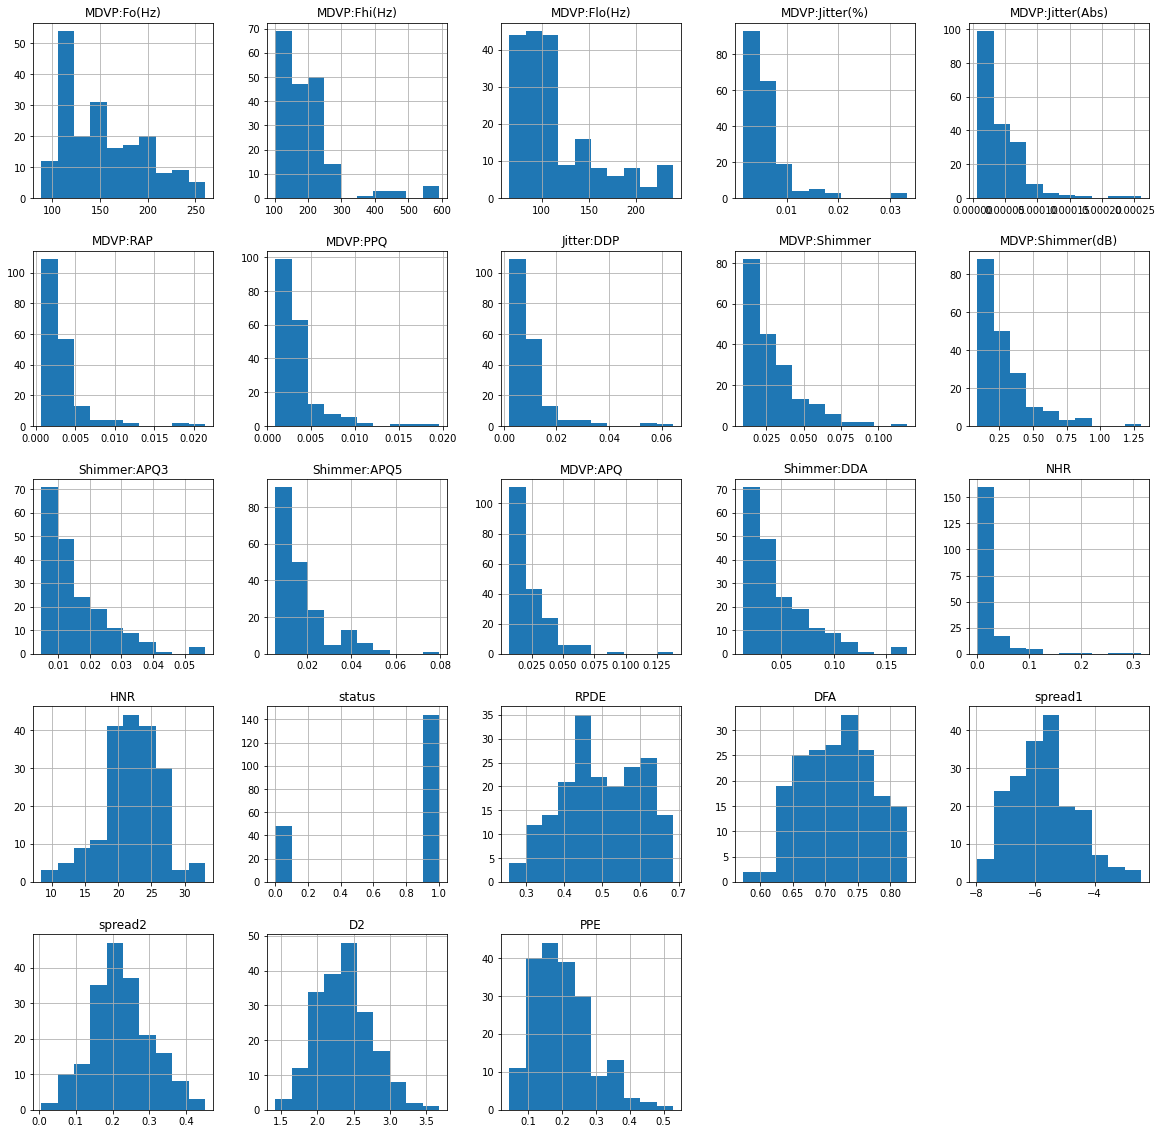

In [46]:
df.hist(figsize=(20,20));


Concise view of histograms of features and indicative of potential outliers.

# Average Samples


---



Average six samples per individual

In [19]:
import numpy as np

In [20]:
# Group every six rows in dataframe and average column values.  (Six sets of data per individual in the study)
grouped_df = df.groupby(np.arange(len(df.index))//6, axis=0).mean() #source: link below

https://stackoverflow.com/questions/46478518/groupby-dataframe-by-n-columns-or-n-rows

In [21]:
grouped_df.shape  #32 individuals and 23 features

(32, 23)

In [22]:
grouped_df['status'].value_counts() #Looking at number of PD diagnoses (24) versus non-PD (8)

1    24
0     8
Name: status, dtype: int64

In [23]:
grouped_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,118.719333,141.312833,106.029833,0.010085,0.000087,0.004998,0.007312,0.014992,0.053932,0.515167,0.028025,0.039770,0.037348,0.084073,0.016318,20.406667,1,0.428488,0.821314,-4.239926,0.296836,2.342642,0.353841
1,99.770333,121.894333,95.413167,0.004585,0.000050,0.002325,0.002857,0.006978,0.021668,0.194333,0.011042,0.013113,0.018123,0.033125,0.008917,22.997333,1,0.598429,0.778017,-5.420414,0.308289,2.287428,0.234019
2,147.346167,216.867500,87.532333,0.004347,0.000030,0.001760,0.002320,0.005285,0.019343,0.181667,0.009383,0.011003,0.018410,0.028148,0.013080,23.899667,1,0.521660,0.645843,-5.337281,0.249288,2.360638,0.232007
3,159.837667,181.630167,86.767167,0.006247,0.000040,0.003062,0.003422,0.009188,0.043337,0.388167,0.020492,0.026550,0.044458,0.061477,0.025608,19.058667,1,0.626723,0.695886,-4.560947,0.278482,2.787869,0.310658
4,150.644667,208.264333,78.278333,0.005230,0.000037,0.002725,0.002838,0.008173,0.021367,0.209667,0.009673,0.012625,0.020725,0.029023,0.014892,24.762000,1,0.432723,0.719675,-6.223537,0.228296,2.440360,0.164939


# Identify Outliers

In [47]:
Q1 = grouped_df.quantile(0.25)  # Source: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
Q3 = grouped_df.quantile(0.75)  # Calculating Q1, Q3 and the Interquartile Range
IQR = Q3 - Q1
print(IQR)

MDVP:Fo(Hz)         65.244792
MDVP:Fhi(Hz)        86.039708
MDVP:Flo(Hz)        34.930125
MDVP:Jitter(%)       0.002968
MDVP:Jitter(Abs)     0.000027
MDVP:RAP             0.002051
MDVP:PPQ             0.001665
Jitter:DDP           0.006152
MDVP:Shimmer         0.019556
MDVP:Shimmer(dB)     0.167083
Shimmer:APQ3         0.010846
Shimmer:APQ5         0.010442
MDVP:APQ             0.015026
Shimmer:DDA          0.032534
NHR                  0.019998
HNR                  5.209542
status               0.250000
RPDE                 0.158533
DFA                  0.093904
spread1              1.101794
spread2              0.108440
D2                   0.342768
PPE                  0.076577
dtype: float64


In [48]:
print(grouped_df < (Q1 - 1.5 * IQR)) or (grouped_df > (Q3 + 1.5 * IQR))  # Source: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

# Identifying the outliers which fall 1.5 times the interquartile range below the 1st quartile OR 1.5 times the interquartile
# range above the third quartile

    MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  ...  spread2     D2    PPE
0         False         False         False  ...    False  False  False
1         False         False         False  ...    False  False  False
2         False         False         False  ...    False  False  False
3         False         False         False  ...    False  False  False
4         False         False         False  ...    False  False  False
5         False         False         False  ...    False  False  False
6         False         False         False  ...    False  False  False
7         False         False         False  ...    False  False  False
8         False         False         False  ...    False  False  False
9         False         False         False  ...    False  False  False
10        False         False         False  ...    False  False  False
11        False         False         False  ...    False  False  False
12        False         False         False  ...    False  False

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
grouped_df_ready = grouped_df[~((grouped_df < (Q1 - 1.5 * IQR)) | (grouped_df > (Q3 + 1.5 * IQR))).any(axis=1)] # This code (also from source above) creates a 
grouped_df_ready.shape

(19, 23)

In [50]:
grouped_df_ready

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,99.770333,121.894333,95.413167,0.004585,0.000050,0.002325,0.002857,0.006978,0.021668,0.194333,0.011042,0.013113,0.018123,0.033125,0.008917,22.997333,1,0.598429,0.778017,-5.420414,0.308289,2.287428,0.234019
2,147.346167,216.867500,87.532333,0.004347,0.000030,0.001760,0.002320,0.005285,0.019343,0.181667,0.009383,0.011003,0.018410,0.028148,0.013080,23.899667,1,0.521660,0.645843,-5.337281,0.249288,2.360638,0.232007
3,159.837667,181.630167,86.767167,0.006247,0.000040,0.003062,0.003422,0.009188,0.043337,0.388167,0.020492,0.026550,0.044458,0.061477,0.025608,19.058667,1,0.626723,0.695886,-4.560947,0.278482,2.787869,0.310658
4,150.644667,208.264333,78.278333,0.005230,0.000037,0.002725,0.002838,0.008173,0.021367,0.209667,0.009673,0.012625,0.020725,0.029023,0.014892,24.762000,1,0.432723,0.719675,-6.223537,0.228296,2.440360,0.164939
6,182.032500,196.059833,170.768167,0.003227,0.000018,0.001763,0.001882,0.005297,0.016737,0.151000,0.008605,0.010395,0.013543,0.025815,0.003183,25.748333,1,0.355864,0.768637,-6.384376,0.193017,2.400193,0.147991
9,113.014000,154.201333,105.652667,0.008043,0.000072,0.003508,0.005035,0.010527,0.029677,0.288667,0.016153,0.018268,0.023212,0.048467,0.009658,21.716167,1,0.542488,0.816804,-4.519291,0.239992,1.934123,0.325605
11,141.336667,165.070500,66.233833,0.009008,0.000065,0.005090,0.004368,0.015263,0.042640,0.407333,0.024323,0.021428,0.031238,0.072968,0.030192,20.071500,1,0.498593,0.728725,-5.632290,0.181494,2.304551,0.200625
12,112.839667,208.860000,107.392833,0.004850,0.000042,0.002468,0.002817,0.007405,0.025015,0.224500,0.014600,0.013790,0.018645,0.043795,0.005568,24.957500,1,0.470775,0.796989,-5.523149,0.290730,2.001244,0.218907
13,97.938333,107.757500,88.550000,0.006800,0.000067,0.003947,0.003833,0.011842,0.030255,0.283667,0.017137,0.017875,0.021605,0.051415,0.015082,20.428167,1,0.581914,0.779876,-5.108384,0.184316,2.296103,0.261419
15,154.456000,165.824667,121.489667,0.003882,0.000025,0.002067,0.002143,0.006200,0.047405,0.448167,0.026377,0.029218,0.035472,0.079128,0.012505,20.998000,1,0.453155,0.709652,-6.238675,0.171955,2.288462,0.159809


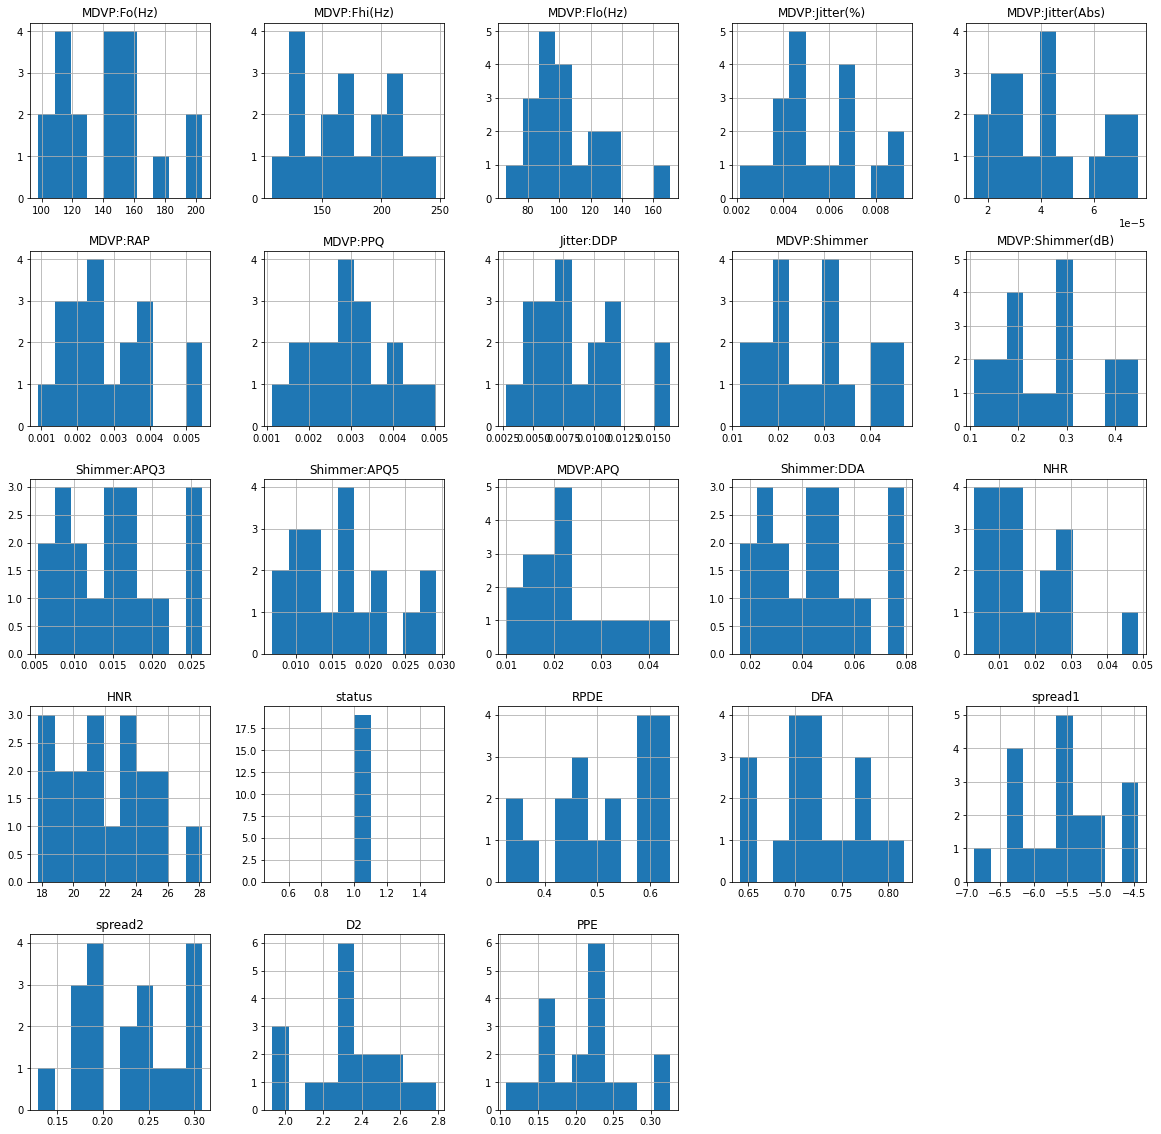

In [51]:
grouped_df_ready.hist(figsize = (20,20));    # Outliers removed

The above are histograms of voice measurements after outliers have been removed.  The irregular shapes of the histograms may indicate that removing the outliers has removed too much information from the data set.  As a result, an additional correlation heatmap may show any changes to correlations between the variables as a result of removing the outliers.

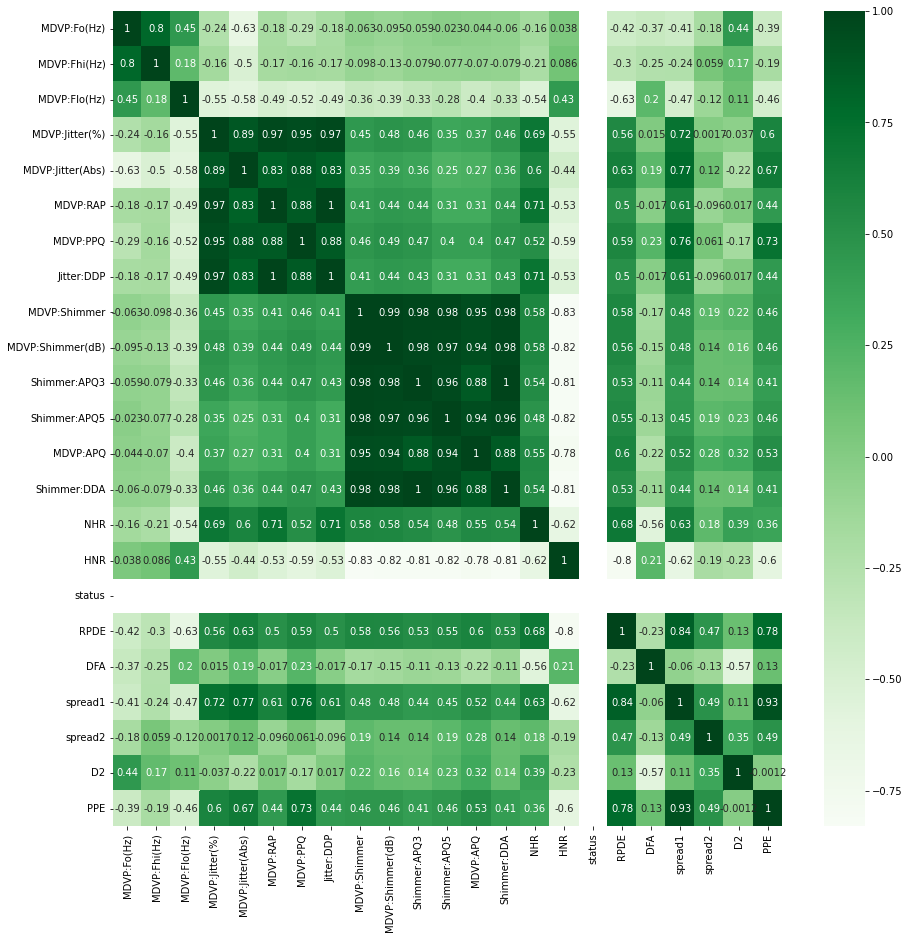

In [57]:
corr1 = grouped_df_ready.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr1, cmap = 'Greens', annot=True)

A blanket removal of outliers removed all samples that were not diagnosed as PD.  Correlations between variables also changed significantly after removing outliers suggesting that there is the potential for important information in the data that is mathematically being considered outliers. 

The visual above shows that there is a linear relationship between the two voice measures, PPE and spread1.  Also shown on the diagram is whether each point was a positive Parkinson's diagnosis or not.  The higher the PPE and spread1, the more likely a positive diagnosis and alternately, the lower PPE and lower spread, the less likely a diagnosis of Parkinson's.

Text(0.5, 1.0, 'Two Voice Measures and Parkinsons Diagnosis')

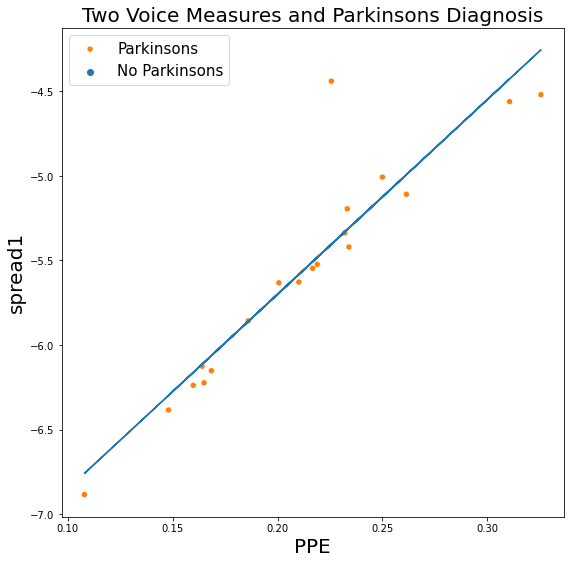

In [56]:
plt.figure(figsize=(9,9))
Scatter = sns.scatterplot(x = 'PPE', y = 'spread1', hue = df['status'], data = grouped_df_ready);

plt.ylabel('spread1', fontsize = 20)
plt.xlabel('PPE', fontsize = 20)
plt.legend(loc='upper left', labels=['Parkinsons', 'No Parkinsons' ], fontsize=15)


x = grouped_df_ready['PPE']
y = grouped_df_ready['spread1']

# obtain m (slope) and b (y-intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.title('Two Voice Measures and Parkinsons Diagnosis', fontsize = 20)

The above visual is created for the data set after six samples per individual were averaged and all "outliers" in the data set were removed.  These outliers more than likely have additional information important to the classification of PD.

Based on these results from removing outliers on such a small data set.  The next step will be to look for outliers in the nonaveraged data set and compare results.